<a href="https://colab.research.google.com/github/hason8193/Computer-Vision-Projects/blob/main/TemplateMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [45]:
farm_img = cv2.imread("farm.png",cv2.IMREAD_UNCHANGED)
wheat_img = cv2.imread("needle.png",cv2.IMREAD_UNCHANGED)

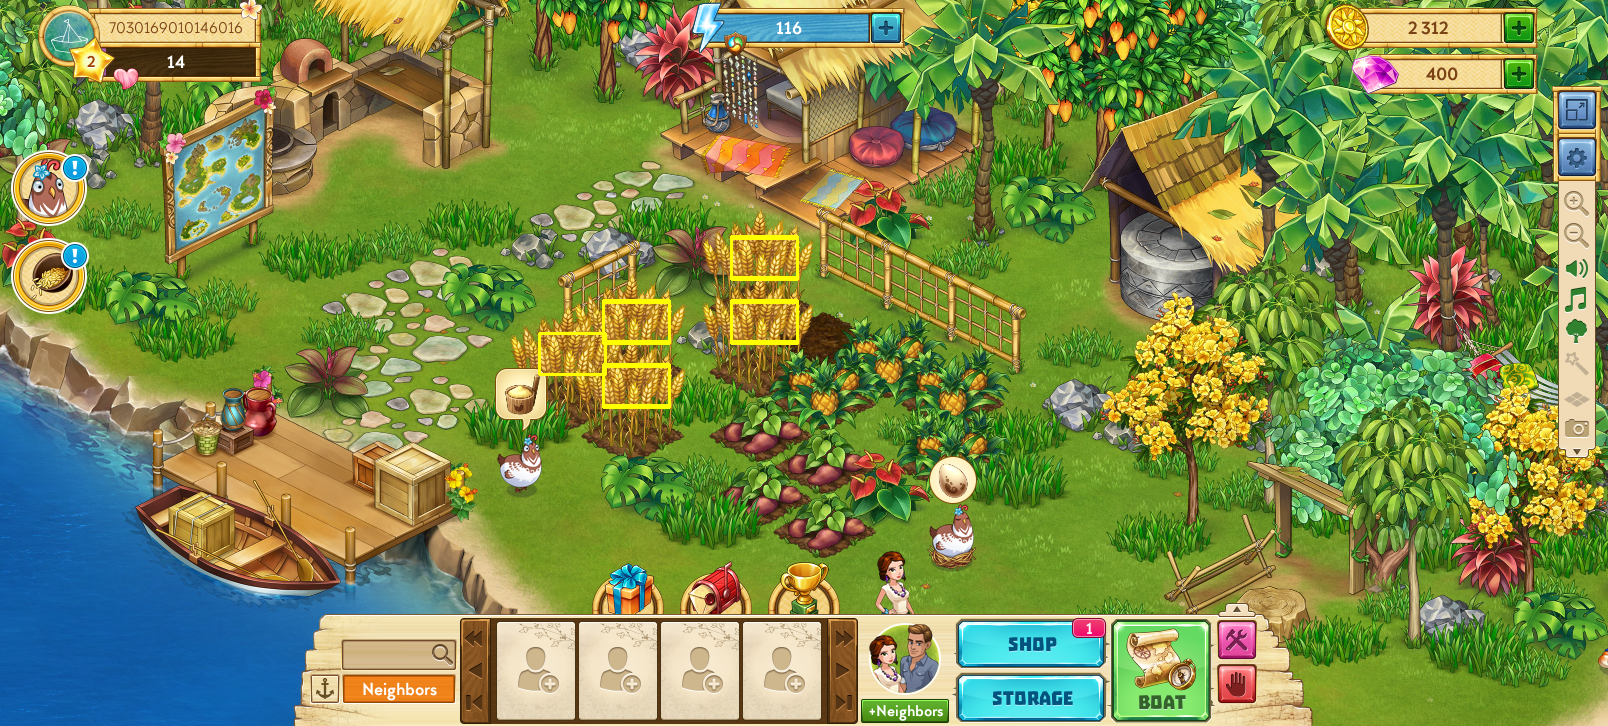

In [63]:
cv2_imshow(farm_img)

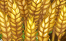

In [47]:
cv2_imshow(wheat_img)

In [48]:
result = cv2.matchTemplate(farm_img,wheat_img,cv2.TM_CCOEFF_NORMED)

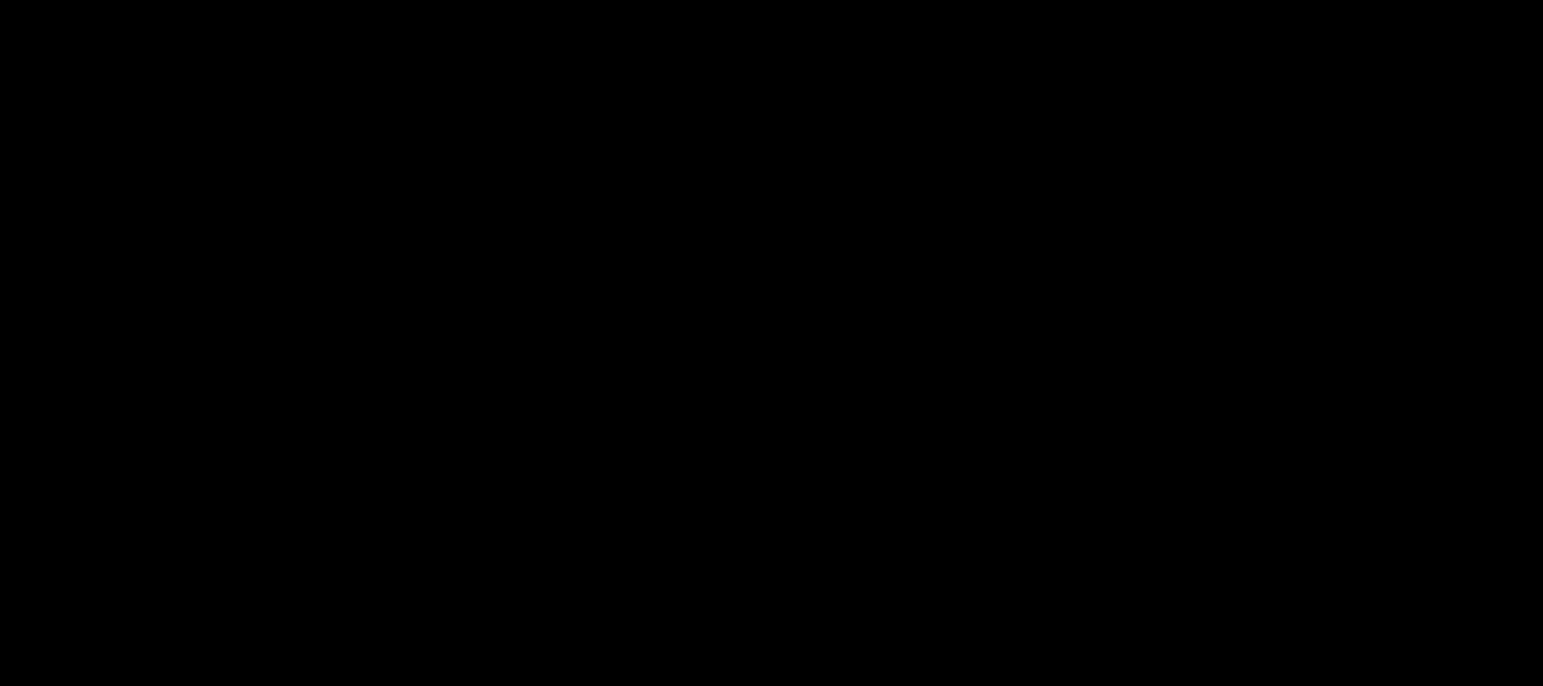

In [49]:
cv2_imshow(result)

In [50]:
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(result)

In [51]:
max_loc

(731, 301)

In [52]:
max_val

0.999998927116394

In [53]:
w = wheat_img.shape[1]
h = wheat_img.shape[0]

In [54]:
cv2.rectangle(farm_img,max_loc,(max_loc[0]+w,max_loc[1]+h),(0,255,255),2)

array([[[ 37, 114,  84],
        [ 55, 130, 102],
        [ 38, 110,  77],
        ...,
        [ 67, 111,  27],
        [ 67, 111,  27],
        [ 53, 111,  18]],

       [[ 36, 121,  78],
        [ 38, 110,  77],
        [ 38, 110,  77],
        ...,
        [ 67, 111,  27],
        [ 67, 111,  27],
        [ 67, 111,  27]],

       [[ 48, 165, 109],
        [ 50, 158,  96],
        [ 36, 121,  78],
        ...,
        [ 67, 111,  27],
        [ 67, 111,  27],
        [ 66, 124,  25]],

       ...,

       [[172,  93,  14],
        [172,  93,  14],
        [172,  93,  14],
        ...,
        [169, 214, 237],
        [171, 216, 239],
        [172, 217, 240]],

       [[173,  94,  15],
        [173,  94,  15],
        [172,  93,  14],
        ...,
        [172, 217, 240],
        [172, 217, 240],
        [173, 215, 239]],

       [[173,  94,  15],
        [173,  94,  15],
        [172,  93,  14],
        ...,
        [172, 214, 238],
        [173, 215, 239],
        [173, 215, 239]]

In [55]:
threshold = .6

In [56]:
yloc,xloc = np.where(result >= threshold)
len(xloc)

13

In [57]:
for(x,y) in zip(xloc,yloc):
  cv2.rectangle(farm_img,(x,y),(x+w,y+h),(0,255,255),2)

In [58]:
rectangles = []
for(x,y) in zip(xloc,yloc):
  rectangles.append([int(x),int(y),int(w),int(h)])
  rectangles.append([int(x),int(y),int(w),int(h)])

In [59]:
len(rectangles)

26

In [60]:
rectangles,weights = cv2.groupRectangles(rectangles,1,0.2)

In [61]:
len(rectangles)

5

In [62]:
for(x,y,w,h) in rectangles:
  cv2.rectangle(farm_img,(x,y),(x+w,y+h),(0,255,255),2)